In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("haberman.csv")

In [3]:
df

,Age,year,positive_axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [4]:
df.shape

(306, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      306 non-null    int64
 1   year                     306 non-null    int64
 2   positive_axillary_nodes  306 non-null    int64
 3   survival_status          306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [6]:
df.columns

Index(['Age', 'year', 'positive_axillary_nodes', 'survival_status'], dtype='object')

In [7]:
g=df.groupby('year')
g
for year,year_df in g:
    print(year)
    
    print(year_df)

58
     Age  year  positive_axillary_nodes  survival_status
5     33    58                       10                1
9     34    58                       30                1
20    37    58                        0                1
37    39    58                        0                1
40    40    58                        2                1
41    40    58                        0                1
46    41    58                        0                1
55    42    58                        0                1
62    43    58                       52                2
74    44    58                        9                2
89    46    58                        2                2
94    46    58                        3                1
103   47    58                        3                1
107   48    58                       11                2
108   48    58                       11                2
130   50    58                        1                1
156   53    58              

# Haberman's Survival Data:

The dataset contains data of Cancer Survival Pateints in a hospital between 1958 to 1969. It contains four attributes which are 
1. Age of pateint at the time of operation.
2. Pateints year of Operation.(1958-1969)
3. No of positive axillary nodes.
4. Survival Status(1=the patient survived, 2=the patient died)

In [8]:
df.describe()

,Age,year,positive_axillary_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Observations:

1. Oldest patient : 83 years old
2. Youngest patient : 30 years old
3. Average patient age: 52 years
4. Median age : 52 years old
5. Highest number of Axillary nodes in a person : 52
6. Lowest number of Axillary nodes in a person : 0
7. Average number of Axillary nodes : 4
8. Median number of Axillary nodes : 1
9. No. of Axillary nodes in most patients or axillary nodes of 75% patients are: 0-4 
10. 50% patients have age from: 44-60 years

In [9]:
df.survival_status.value_counts()

1    225
2     81
Name: survival_status, dtype: int64

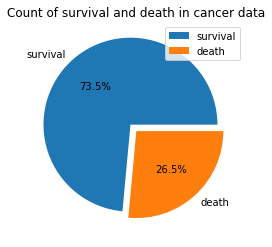

In [10]:
plt.pie(df.survival_status.value_counts(),labels=['survival','death'],explode=(0.1,0),autopct='%1.1f%%')
plt.title('Count of survival and death in cancer data')
plt.legend()
plt.show()

## Observation

We observe that the data set is imbalanced dataset. 
The survival of pateints after 5 years is 73.5% and death of pateints after 5 years is only 26.5% which shows that treatment is effective.

In [11]:
Alive=df.loc[df['survival_status']==1]
Death=df.loc[df['survival_status']==2]

# 2-D Scatter Plots

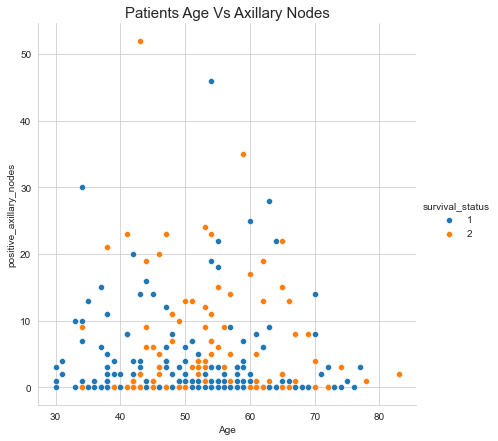

In [14]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='survival_status',height=6).map(sns.scatterplot,'Age','positive_axillary_nodes').add_legend()
plt.title('Patients Age Vs Axillary Nodes',size=15)
plt.show()

## observation

Large number od people of nodes less than 10.

* People of age 30-40 have low mortality rate as compared to other age groups.
* It's not very clear as most of the points are overlappig each other.

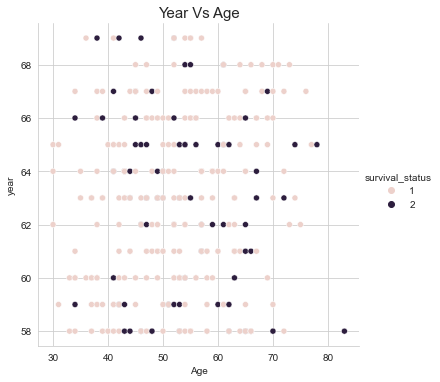

In [15]:
sns.relplot(data=df,x='Age',y='year',hue='survival_status',height=5)
plt.title('Year Vs Age',size=15)
plt.show()

## Observation

* We observe that there are more chances of survival as compared to death after 5 years of treatment.
* In year 1963 the mortality rate is high as compared to other years.

# Pairwise Scatter Plot : Pairplot  

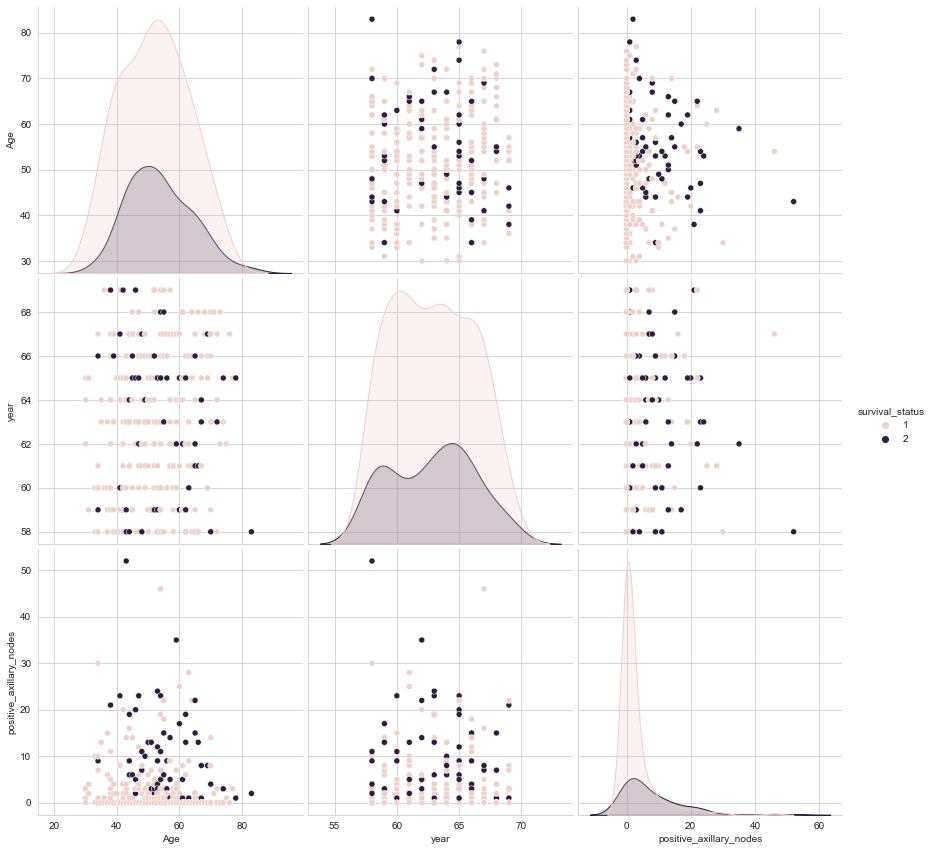

In [16]:
plt.close()
sns.pairplot(df,hue='survival_status',height=4)
plt.show()

## Observation

* From Age and positive Axillary Nodes , we observe that from age 30-80 and nodes less 10 have low mortality rate.
*

# Histogram, pdf, cdf

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


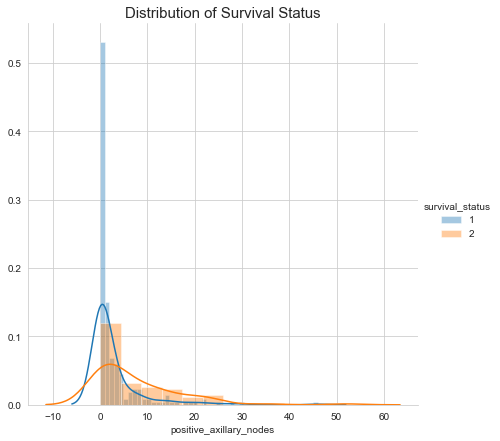

In [17]:
# Analysis of Axillary Nodes
sns.FacetGrid(df,hue='survival_status',height=6).map(sns.distplot,'positive_axillary_nodes').add_legend()
plt.title('Distribution of Survival Status',size=15)
plt.show()

## Observation:

1. If the number of positive nodes is 0 then there is a high chances that pateint survives more than 5 years.
2. If the number of positive nodes is less than 4 then there is a high chances of survival of more than 5 years.
3. As the number of positive nodes increases the chances of survival becomes very low.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


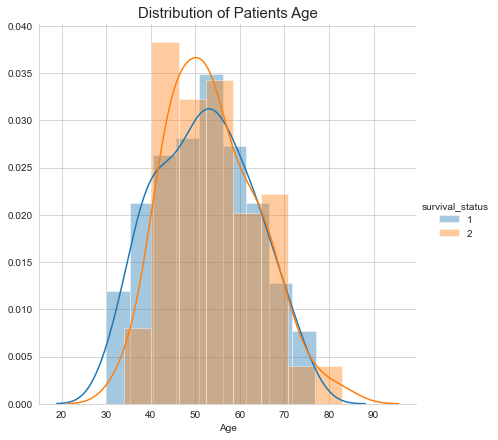

In [18]:
# Analysis of Patient Age
sns.FacetGrid(df,hue='survival_status',height=6).map(sns.distplot,'Age').add_legend()
plt.title('Distribution of Patients Age',size=15)
plt.show()

## Observation

1. The age group between 40-70 has nearly the same survival and death status and also this age group have higher risk of cancer.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


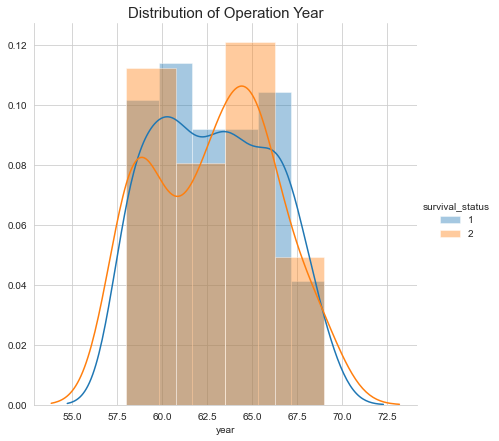

In [19]:
sns.FacetGrid(df,hue='survival_status',height=6).map(sns.distplot,'year').add_legend()
plt.title('Distribution of Operation Year',size=15)
plt.show()

## Observation

1. The operations at initial years is not much successful as more mortality rate in this year 1958. Again there are more failed opeartions resulting more deaths in year 1963-1966. 
2. Majority of data is being overlapped.


 PDF:
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]


 Bin Edges
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


 CDF
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]


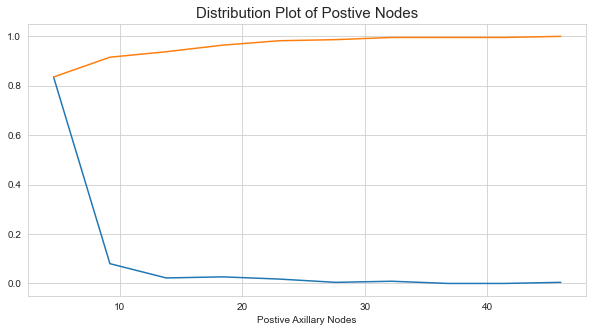

In [20]:
# Plots of CDF and PDF of positive axillary nodes for survival status
plt.figure(figsize=(10,5))
counts,bin_edges=np.histogram(Alive['positive_axillary_nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
print("\n PDF:")
print(pdf)
print("\n\n Bin Edges")
print(bin_edges)

cdf=np.cumsum(pdf)
print("\n\n CDF")
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#Plot the 
plt.xlabel('Postive Axillary Nodes')
plt.title('Distribution Plot of Postive Nodes',size=15)
plt.show()

## Observation:

1. There is 84% chances of survival if the positive axillary nodes is less than 3.
2. As the positive axillary nodes increases the chances of survival is very low.

# Mean , Variance and Std. Deviation: 

In [21]:
print("Mean of Survived patients:")
print(np.mean(Alive['Age']))
print(np.mean(Alive['positive_axillary_nodes']))
print("\nMean of less Survived patients:")
print(np.mean(Death["Age"]))
print(np.mean(Death['positive_axillary_nodes']))
print("\nStandard Deviation of Survived patients:")
print(np.std(Alive['positive_axillary_nodes']))
print("\nStd deviation of less Survived patients:")
print(np.std(Death['positive_axillary_nodes']))

Mean of Survived patients:
52.01777777777778
2.7911111111111113

Mean of less Survived patients:
53.67901234567901
7.45679012345679

Standard Deviation of Survived patients:
5.857258449412131

Std deviation of less Survived patients:
9.128776076761632


## Obsevation:

1. Mean Age of Survival patients of more than 5 years and less than 5 years are 52 years and 54 years respectively.
2. Mean and Std. deviation of positive axillary nodes of more than 5 years survival patients are 3 and 6 respt.
3. Mean and Std. deviation of positive axillary nodes of less than 5 years survival patients are 8 and 9 respt.

# Median, Percentiles and Quantiles:

In [26]:
print("Median")
print(np.median(Alive['positive_axillary_nodes']))
print(np.median(Death['positive_axillary_nodes']))

print('\nPercentiles')
print(np.percentile(Alive['positive_axillary_nodes'],90))
print(np.percentile(Death['positive_axillary_nodes'],90))

print('\nQuantiles')
print(np.percentile(Alive['positive_axillary_nodes'],np.arange(0,101,25)))
print(np.percentile(Death['positive_axillary_nodes'],np.arange(0,101,25)))


Median
0.0
4.0

Percentiles
8.0
20.0

Quantiles
[ 0.  0.  0.  3. 46.]
[ 0.  1.  4. 11. 52.]


#### Observation for median:
1. Median of axillary nodes of patients who survive more than 5 years is 0.
2. Median of axillary nodes of patients who survive less than 5 years is 4.

#### Obsevation for Percentiles:
1. 90% patients have axillary nodes of less than or equal to 8 who survived more than 5 years.
2. 90% patients have axillary nodes of less than or equal to 20 who survived less than 5 years of operation.

#### Observation for Quantiles:
###### For patients survived more than 5 years
1. 25% patients have 0 positive axillary nodes who survived more than 5 years.
2. 50% patients have 0 positive axillary nodes who survived more than 5 years.
3. 75% patients have maximum 3 positive axillary nodes who survived more than 5 years.
###### For patients survived less than 5 years
4. 25% patients have maximum 1 positive axillary nodes but they not survives for more than 5 years.
5. 50% patients have maximum 4 positive axillary nodes who died before 5 years of operation.
6. 75% patients have maximum 11 positive axillary nodes who survived less than 5 years.

## Median Absolute Deviation:
MAD is the measure of dispersion better than IQR for approximation of Std. Deviation 

In [33]:
from statsmodels import robust
print("Median Absolute Deviation")
print(robust.mad(Alive['positive_axillary_nodes']))
print(robust.mad(Death['positive_axillary_nodes']))

Median Absolute Deviation
0.0
5.930408874022408


## Observation:

1. MAD for patients survived more than 5 years is 0.
2. For patients survived less than 5 years is 6.

# Box Plot and Whiskers:

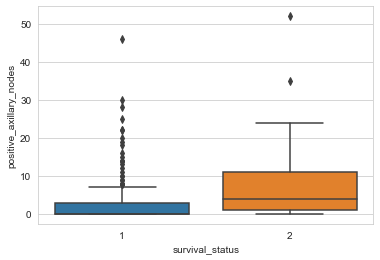

In [42]:
sns.boxplot(data=df, x='survival_status',y='positive_axillary_nodes')
plt.show()

## Observation:

1. The 75% patients who survived more than 5 years is nearly equal to 25% patients who died before 5 years.
2. The threshold points of positive axillary nodes for survived patients is 0-8.
3. The threshold points of positive axillary nodes for patients who didn't survive more than 5 years is 0-25.
4. There is almost 60% chances of error as we categorize in positive axillary nodes for patients who survive more than and less than 5 years of of operation.


# Violin Plots

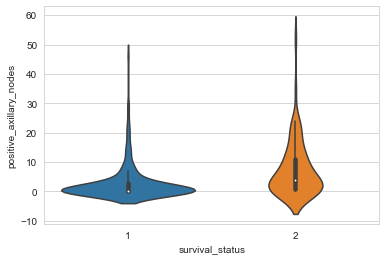

In [47]:
sns.violinplot(data=df,x='survival_status',y='positive_axillary_nodes',size=8)
plt.show()

## Observation:
1. The distribution is highly postively skewed for both patients who survived or not for more than 5 years of operation.

# Multivariate Prob. Density & Contour Plot 

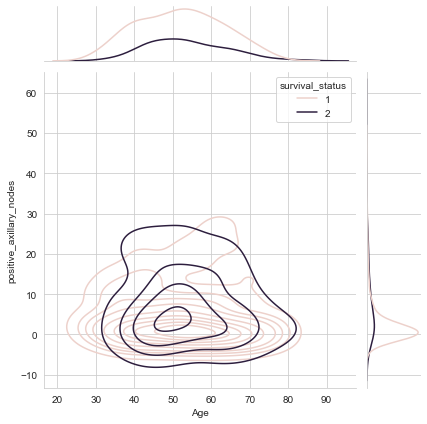

In [55]:
sns.jointplot(x='Age',y='positive_axillary_nodes',data=df,hue='survival_status',kind='kde')
plt.show()